In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import sys
import time
import datetime
import copy

sys.path.append("/Users/giovanni/MyPackages/myutils/myutils/")

from myutils import get_info
from myplots import *
from mytools import *

%matplotlib inline
%connect_info


font = {'family' : 'normal',
'size'   : 9}
plt.rc('font', **font)
#plt.rcParams['savefig.dpi']=200


{
  "stdin_port": 49860, 
  "ip": "127.0.0.1", 
  "control_port": 49861, 
  "hb_port": 49862, 
  "signature_scheme": "hmac-sha256", 
  "key": "2775f8b3-0ea1-4943-99ba-ab6fe9a8802e", 
  "kernel_name": "", 
  "shell_port": 49858, 
  "transport": "tcp", 
  "iopub_port": 49859
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /Users/giovanni/Library/Jupyter/runtime/kernel-12f35c43-f0ea-4beb-9fa0-59eb03bcc64d.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


/Users/giovanni/MyPackages/sclutils/sclutils/sql/features.py:6: UserWarning: features: These dictionaries have been deprecated. They are maintained in `SCLModels` and can be accesses with `from sclmodels.sql import features`
  warn(w)
/Users/giovanni/envs/work/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/giovanni/envs/work/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/Users/giovanni/envs/work/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .t

In [2]:
def check_for_nan(df):
    count = 0
    nulllables = []
    for i,j in enumerate(df.columns):
        a = len(df[ df[j].isnull()] )
        b = df[j]==np.inf
        if a!=0:
            count += 1
            nulllables.append(j)
            print j,i
    
    if count!=0:
        print nulllables
        return False
    else:
        return True

# Target selection 

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.set_index('ID', inplace=True)
test.set_index('ID', inplace=True)

print train['target'].value_counts()
N = train['target'].value_counts()[1]
print train.shape[0], train.shape[1]
print test.shape[0], train.shape[1]

1    87021
0    27300
Name: target, dtype: int64
114321 132
114393 132


In [5]:
train.head()

/Users/giovanni/envs/work/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/giovanni/envs/work/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
ID,,,,,,,,,,,,,,,,,,,,,
3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [6]:
ids = train.index

In [7]:
savetrain = copy.copy(train)
mask1 = train['target']==1
mask0 = train['target']==0
N = 5000
#train = pd.concat([train[mask1].sample(N), train[mask0].sample(N)])
Y = train['target']
train.drop('target', inplace=True, axis=1)
print train.shape[0], train.shape[1]

114321 131


In [8]:
leftout = savetrain[~savetrain.index.isin(train.index)]
leftout.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
ID,,,,,,,,,,,,,,,,,,,,,


In [9]:
map_feat = {}
map_feat['ordinal'] = []
map_feat['binary'] = []
map_feat['multicategorical'] = []
map_feat['unary'] = []

null = []
for i in train.columns:
    L = len(train[i].unique())
    if L==2:
        map_feat['binary'] += [i]
        print 'binary', i, (train[i].isnull()).sum()*100./train.shape[0], len(train[i].unique()), train[i].si
        print 'max', train[i].max(), 'min', train[i].min()

    if L>2 and L<10:
        map_feat['multicategorical'] += [i]
        print 'multicategorical', i, (train[i].isnull()).sum()*100./train.shape[0], len(train[i].unique())
        print 'max', train[i].max(), 'min', train[i].min()
    
    if L>=5:
        map_feat['ordinal'] += [i]
        print 'ordinal', i, (train[i].isnull()).sum()*100./train.shape[0], len(train[i].unique())
        print 'max', train[i].max(), 'min', train[i].min()
        
    if train[i].isnull().sum()==train.shape[0]:
        null += [i]
    print "\n"

ordinal v1 43.589541729 64488
max 20.0000006294 min -9.99649701427e-07


ordinal v2 43.5580514516 64525
max 19.9999999087 min -9.81761449207e-07


multicategorical v3 3.02394135811 4
max C min inf


ordinal v4 43.5580514516 64525
max 19.9999997446 min -6.47592938974e-07


ordinal v5 42.532867977 65672
max 20.0000003539 min -5.28706773973e-07


ordinal v6 43.589541729 64488
max 20.0000005964 min -9.05509144998e-07


ordinal v7 43.589541729 64490
max 19.9999998141 min -9.46876549674e-07


ordinal v8 42.5284943274 65689
max 20.000000997 min -7.78377810758e-07


ordinal v9 43.6061615976 64452
max 20.0000007502 min -9.82875684434e-07


ordinal v10 0.0734773138793 112486
max 18.5339164478 min -9.87531659989e-07


ordinal v11 43.5930406487 64478
max 20.0000009233 min -1.45906182755e-07


ordinal v12 0.0752267737336 114234
max 18.7105503906 min 5.14322389107e-07


ordinal v13 43.589541729 64489
max 20.0000009059 min -8.46488878755e-07


ordinal v14 0.00349891970854 110473
max 19.9999996125 min

v3 96.9760586419
v24 100.0
v30 47.4199840799
v31 96.9760586419
v62 100.0
v66 100.0
v71 100.0
v74 100.0
v75 100.0
v91 99.9973758102
v107 99.9973758102
v110 100.0


/Users/giovanni/envs/work/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


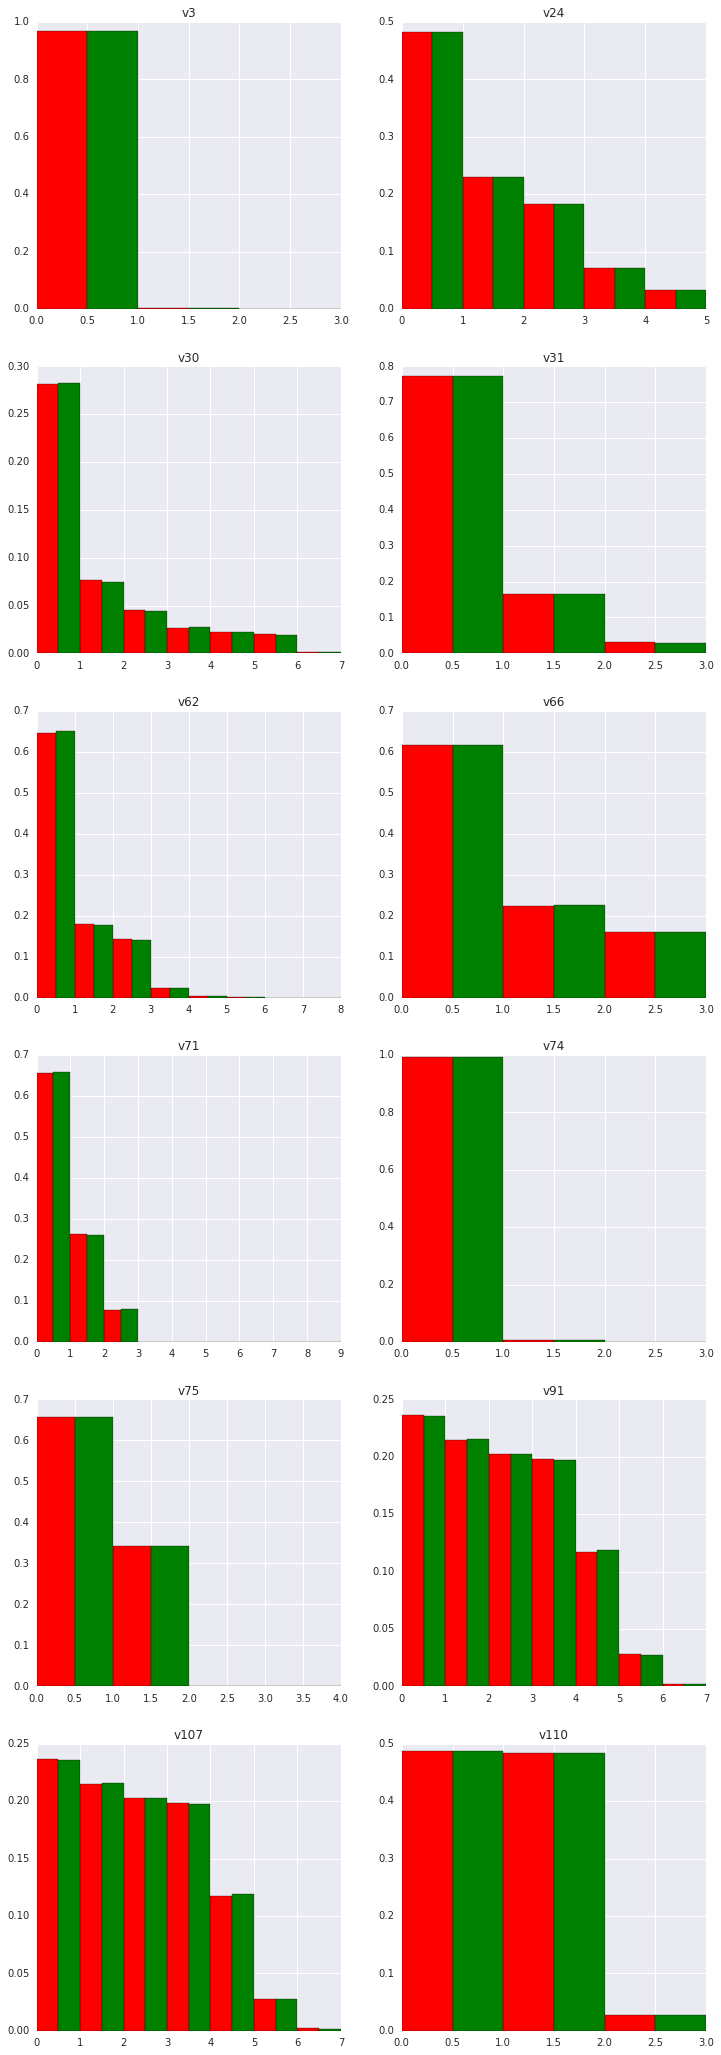

In [10]:
L = len(map_feat['multicategorical'])
nrows = L/2 if L%2==0 else (L+1)/2
fig = plt.figure(figsize=(12, nrows * 6))

for i,col in enumerate(map_feat['multicategorical']):

    print col, train[col].notnull().sum()*100./train.shape[0]

    ax = fig.add_subplot(nrows, 2, i+1)
    temp = train[col].value_counts()/train.shape[0]
    ax.bar(range(len(temp)), temp.values, width=0.5, color='r')
    temp2 = test[col].value_counts()/test.shape[0]
    ax.bar(np.arange(len(temp2))+0.5, temp2.values,  width=0.5, color='g')
    ax.set_title(col)

plt.show()

v1 100.0
v2 100.0
v4 100.0
v5 100.0
v6 100.0
v7 100.0
v8 100.0
v9 100.0
v10 100.0
v11 100.0
v12 100.0
v13 100.0
v14 100.0
v15 100.0
v16 100.0
v17 100.0
v18 100.0
v19 100.0
v20 100.0
v21 100.0
v22 99.5626350364
v23 55.6730609424
v24 100.0
v25 57.4715056726
v26 56.410458271
v27 56.410458271
v28 56.410458271
v29 56.410458271
v30 47.4199840799
v32 56.410458271
v33 56.410458271
v34 99.9029049781
v35 56.410458271
v36 57.467132023
v37 56.4008362418
v38 100.0
v39 56.4069593513
v40 99.9029049781
v41 56.410458271
v42 56.410458271
v43 56.4069593513
v44 56.4419485484
v45 56.410458271
v46 57.4715056726
v47 100.0
v48 56.4419485484
v49 56.410458271
v50 99.9247732263
v51 55.6704367527
v52 99.9973758102
v53 56.4069593513
v54 57.4715056726
v55 56.410458271
v56 93.9801086415
v57 56.410458271
v58 56.4069593513
v59 56.4419485484
v60 56.410458271
v61 56.4419485484
v62 100.0
v63 57.4715056726
v64 56.4419485484
v65 56.4034604316
v67 56.410458271
v68 56.4069593513
v69 56.3553502856
v70 57.4566352639
v71 100.0


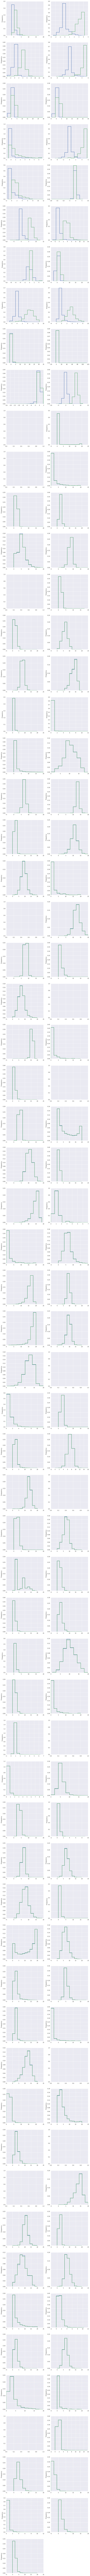

In [22]:
L = len(map_feat['ordinal'])
nrows = L/2 if L%2==0 else (L+1)/2
fig = plt.figure(figsize=(12, nrows * 6))

for i,col in enumerate(map_feat['ordinal']):

    print col, train[col].notnull().sum()*100./train.shape[0]

    ax = fig.add_subplot(nrows, 2, i+1)
    try:
        mini = train[col].min()
        maxi = train[col].max()
        
        train[col].plot(kind='hist', ax=ax, range=(mini, maxi), normed=True, histtype='step', lw=2, label='train')
        test[col].plot(kind='hist', ax=ax, range=(mini, maxi), normed=True, histtype='step', lw=2, label='test')
    except:
        pass

plt.show()

In [2]:
print train.shape
train = train.dropna(axis=0, how='all')

NameError: name 'train' is not defined

In [1]:
train.isnull(axis=0)

NameError: name 'train' is not defined

# Build the model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from collections import OrderedDict
from sklearn.cross_validation import cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report
from sklearn.calibration import calibration_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from evolutionary_search import EvolutionaryAlgorithmSearchCV

In [ ]:
params = {'n_estimators': 160,
          'learning_rate': 0.07,
          'max_depth': 5,
          'min_samples_leaf': 9,
          'subsample': 0.5,
          'verbose': 0}

clf = GradientBoostingClassifier(**params)
params = {'n_estimators': 160,
          'learning_rate': 0.07,
          'max_depth': 5,
          'subsample': 0.5}

clf2 = XGBClassifier(**params)
clf3 = LogisticRegression(solver='lbfgs')

models = zip(['GBC', 'XGB'], [clf, clf2])

In [ ]:
kf = StratifiedKFold( Y, n_folds = 10)
anovafeat = feature_anova(clf, X, Y, n_perc=60)
print len(anovafeat)

In [ ]:
clf.fit(X[anovafeat], Y)

In [ ]:
feat1 = plot_feature_importances(clf, anovafeat, n_features=40, threshold=1, append_name='_gbc')
print len(feat1)

In [ ]:
test = pd.read_csv("test.csv")
test.set_index('ID', inplace=True)
X_test = processor.transform(test)
X_test.ix[:, processor.categorical] = scaler.transform(X_test[processor.categorical])

In [ ]:
from sclmodels import sample_bias

bias = sample_bias.SampleBiasCorrection()

bias_features = feat1[:5]

numeric_features = [i for i in feat1 if i in map_feat['ordinal']]

bias.fit(X[bias_features], X_test[bias_features], continuous_features=numeric_features)
bias.weights /= np.mean(bias.weights)
bias.plot_marginals(bins=10, **{'lw':3})

In [ ]:
from evolutionary_search import EvolutionaryAlgorithmSearchCV

paramgrid = { 
            "max_depth": np.arange(3, 10, 1),
            "learning_rate": [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
            "n_estimators": [int(est) for est in np.linspace(100,400,num=20)],
            "subsample" : [0.4, 0.5, 0.6, 0.7, 0.8],
             }


gbc = GradientBoostingClassifier()
model = gbc
model = XGBClassifier()
cv = EvolutionaryAlgorithmSearchCV(estimator=model,
                                  params=paramgrid,
                                  scoring="roc_auc",
                                  cv=StratifiedKFold(Y, n_folds=10),
                                  verbose=True,
                                  population_size=50,
                                  tournament_size=3,
                                  gene_crossover_prob=0.5,
                                  generations_number=10, n_jobs=1, 
                                  fit_params={'sample_weight':bias.weights})

# cv.fit(X[feat1], Y)
# print cv.best_params_

# import pickle
# pickle.dump(cv.best_params_, open("best_params.pkl", "wb"))
# np.random.randint(10, size=10)

In [ ]:
params_ = {'n_estimators': 242, 'subsample': 0.7, 'learning_rate': 0.05, 'max_depth': 5}
est = XGBClassifier(**params_)

In [ ]:
binary_classif_metrics = ['accuracy', 'precision', 'roc_auc']
scores = {}
for i in binary_classif_metrics:
    scores[i] = cross_val_score(clf, X[feat1], Y, n_jobs=1, cv = kf, scoring=i, fit_params={'sample_weight':bias.weights})
    print 'Mean ', i, ' = ', scores[i].mean(), 'std = ', scores[i].std()

In [ ]:
binary_classif_metrics = ['accuracy', 'precision', 'roc_auc']
scores = {}
for i in binary_classif_metrics:
    scores[i] = cross_val_score(est, X[feat1].as_matrix(), Y.values, n_jobs=1, cv = kf, scoring=i, fit_params={'sample_weight':bias.weights})
    print 'Mean ', i, ' = ', scores[i].mean(), 'std = ', scores[i].std()

In [ ]:
a = {}; b = {}; c = {}
weight = pd.DataFrame(bias.weights, index=X.index, columns=['weights'])
cvpred = pd.DataFrame(index=ids)
for imodel, model in models:
    cvpred['pred%s'%imodel] = np.nan
    Y_score = OrderedDict(); Yte = OrderedDict(); Y_pred = OrderedDict(); Wte = OrderedDict(); i=0
    print imodel
    for train_index, test_index in kf:
        Xtr, Xte = X.iloc[train_index,:], X.iloc[test_index,:]
        Ytr, Yte[i] = Y.iloc[train_index], Y.iloc[test_index]
        Wtr, Wte[i] = weight.iloc[train_index,:], weight.iloc[test_index,:]

        try:
            model.fit(Xtr[feat1].as_matrix(), Ytr, sample_weight=Wtr['weights'].as_matrix().ravel())
        except:
            model.fit(Xtr[feat1].as_matrix(), Ytr)
        Y_score[i] = model.predict_proba(Xte[feat1].as_matrix())[:,1]
        print Xte.index.shape[0], len(Y_score[i])
        cvpred.loc[test_index, 'pred%s'%imodel] = Y_score[i]
        Y_pred[i] = model.predict(Xte[feat1].as_matrix())   
        i+=1
    cvpred.loc[X_leftout.index, 'pred%s'%imodel] = model.predict_proba(X_leftout)[:,1]
    a[imodel] = np.array([i for k in Yte.keys() for i in Yte[k]])
    b[imodel] = np.array([i for k in Y_score.keys() for i in Y_score[k]])
    c[imodel] = np.array([i for k in Y_pred.keys() for i in Y_pred[k]])

In [ ]:
cvpred

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
for imodel, model in models:
    precision, recall, th = precision_recall_curve(a[imodel], b[imodel])
    ax[0].plot(recall, precision, label=imodel)
ax[0].set_ylim((0,1))
ax[0].set_xlabel("Recall")
ax[0].set_ylabel("Precision")
ax[0].set_title("Precision/Recall curve")
ax[0].legend(loc='best')

for imodel, model in models:
    fpr, tpr, threshold = roc_curve(a[imodel], b[imodel])
    ax[1].plot(fpr, tpr, label=imodel)
ax[1].set_xlabel("False positive")
ax[1].set_ylabel("True positive")
ax[1].set_title("ROC curve")

In [ ]:
nrows = len(models)/2 + 1
fig = plt.figure(figsize=(12, nrows * 6))
ax = fig.add_subplot(nrows, 2, 1)

for imodel, model in models:
    prob_true, prob_pred  = calibration_curve(a[imodel], b[imodel], normalize=True, n_bins=10)
    ax.plot(prob_pred, prob_true, label=imodel)
    ax.set_xlabel("Predicted Prob")
    ax.set_ylabel("Prob count")
    ax.set_title("Calibration curve")
ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax.legend(loc='best')

i = 2
for imodel, model in models:
    ax = fig.add_subplot(nrows, 2, i)
    ax.hist(b[imodel][a[imodel]==1], bins = 20, range=(0,1), color='r', histtype='step', linewidth=2, label='1', normed=True)
    ax.hist(b[imodel][a[imodel]==0], bins = 20, range=(0,1), color='b', histtype='step', linewidth=2, label='0', normed=True)    
    ax.set_xlim((0,1))
    ax.set_title(imodel)
    i+=1

# Etrapolate

In [ ]:
clf2.fit(X[feat1], Y, sample_weight=bias.weights)

In [ ]:
pred = clf2.predict_proba(X_test[feat1])[:,1]

submit = pd.DataFrame(pred, index=test.index, columns=['TARGET'])

In [ ]:
submit.head()

In [ ]:
submit.to_csv('submit.csv', index_col=0)

In [ ]:
bias.weights